<a href="https://colab.research.google.com/github/RafaelRamos19/Visualizacao-de-dados-com-seaborn/blob/main/Data_Visualization_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando base de dados


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


# Tradução

In [ ]:
# dando uma olhada nas colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
# vamos agora renomear essas colunas
renomear = {'total_bill': 'valor_da_conta',
            'tip'    :'gorjeta',
            'dessert':'sobremesa',
            'day'    :'dia_da_semana',
            'time'   :'hora',
            'size'   :'total_de_pessoas'}

type(dados)

pandas.core.frame.DataFrame

In [ ]:
# Estamos mudando o nome do data frame dados para gorjetas já com as colunas traduzidas
gorjetas = dados.rename(columns = renomear)
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
# vamos traduzir os nossos campos
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Com o map() é possível iterar todos os campos do data frame e saber quais devem ser renomeados
lista = {'No': 'não', 'Yes':'sim'}
gorjetas.sobremesa.map(lista)

0      não
1      não
2      não
3      não
4      não
      ... 
239    não
240    sim
241    sim
242    não
243    não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(lista)
gorjetas.head(10)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,não,Sun,Dinner,2
1,10.34,1.66,não,Sun,Dinner,3
2,21.01,3.50,não,Sun,Dinner,3
3,23.68,3.31,não,Sun,Dinner,2
4,24.59,3.61,não,Sun,Dinner,4
5,25.29,4.71,não,Sun,Dinner,4
6,8.77,2.00,não,Sun,Dinner,2
7,26.88,3.12,não,Sun,Dinner,4
8,15.04,1.96,não,Sun,Dinner,2
9,14.78,3.23,não,Sun,Dinner,2


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
dias = {'Sun':'Domingo', 'Sat':'Sabado', 'Thur':'Quinta', 'Fri':'Sexta'}
gorjetas.dia_da_semana.map(dias)


0      Domingo
1      Domingo
2      Domingo
3      Domingo
4      Domingo
        ...   
239     Sabado
240     Sabado
241     Sabado
242     Sabado
243     Quinta
Name: dia_da_semana, Length: 244, dtype: object

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,não,Domingo,Dinner,2
1,10.34,1.66,não,Domingo,Dinner,3
2,21.01,3.50,não,Domingo,Dinner,3
3,23.68,3.31,não,Domingo,Dinner,2
4,24.59,3.61,não,Domingo,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,não,Sabado,Dinner,3
240,27.18,2.00,sim,Sabado,Dinner,2
241,22.67,2.00,sim,Sabado,Dinner,2
242,17.82,1.75,não,Sabado,Dinner,2


In [ ]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora_dia = {'Dinner':'Janta', 'Lunch':'Almoço'}
gorjetas.hora.map(hora_dia)

0      Janta
1      Janta
2      Janta
3      Janta
4      Janta
       ...  
239    Janta
240    Janta
241    Janta
242    Janta
243    Janta
Name: hora, Length: 244, dtype: object

In [ ]:
gorjetas.hora = gorjetas.hora.map(hora_dia)
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas
0,16.99,1.01,não,Domingo,Janta,2
1,10.34,1.66,não,Domingo,Janta,3
2,21.01,3.50,não,Domingo,Janta,3
3,23.68,3.31,não,Domingo,Janta,2
4,24.59,3.61,não,Domingo,Janta,4
...,...,...,...,...,...,...
239,29.03,5.92,não,Sabado,Janta,3
240,27.18,2.00,sim,Sabado,Janta,2
241,22.67,2.00,sim,Sabado,Janta,2
242,17.82,1.75,não,Sabado,Janta,2


# Análise 1 -- Valor da conta e da gorjeta

In [ ]:
# Queremos analizar se conforme o valor da conta aumenta o valor da gorjeta aumenta também, ou diminui
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana', 'hora',
       'total_de_pessoas'],
      dtype='object')

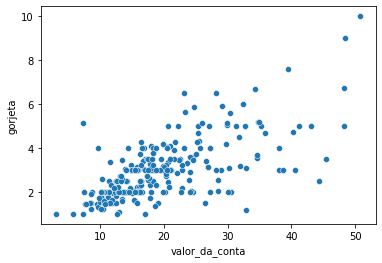

In [ ]:
# Vamos gerar o primeiro gráfico com o seaborn
# o sns.scatterplot gera esse tipo de gráfico com os parâmetros x e y e o data frame usado
valor_gorjeta = sns.scatterplot(x ='valor_da_conta', y ='gorjeta', data=gorjetas)

**Visualmente o valor da gorjeta aumenta conforme o valor da conta aumenta**

In [ ]:
#É importante saber se todos os registros não são nulos
print('Total de dados :\n ', gorjetas.shape[0], '\n')
print('Total de dados que não são nulos:\n')
gorjetas.count()


Total de dados :
  244 

Total de dados que não são nulos:



valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora                244
total_de_pessoas    244
dtype: int64

## criando campo porcentagem 

In [ ]:
gorjetas['Porcentagem'] = gorjetas.gorjeta/gorjetas.valor_da_conta

In [ ]:
#Agora sabemos proporcionalmente o quanto sobre a gorjeta em relação à conta
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,Porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.059447
1,10.34,1.66,não,Domingo,Janta,3,0.160542
2,21.01,3.50,não,Domingo,Janta,3,0.166587
3,23.68,3.31,não,Domingo,Janta,2,0.139780
4,24.59,3.61,não,Domingo,Janta,4,0.146808


In [ ]:
gorjetas.Porcentagem = gorjetas.Porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,Porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.06
1,10.34,1.66,não,Domingo,Janta,3,0.16
2,21.01,3.50,não,Domingo,Janta,3,0.17
3,23.68,3.31,não,Domingo,Janta,2,0.14
4,24.59,3.61,não,Domingo,Janta,4,0.15


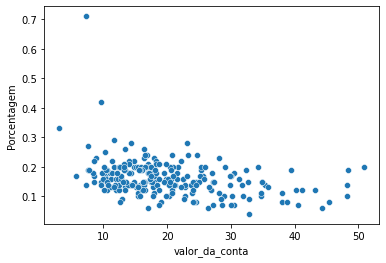

In [ ]:
porcentagem_conta = sns.scatterplot(x ='valor_da_conta', y = 'Porcentagem', data = gorjetas )

**visulamente, o valor da conta não é proporcional com o valor da gorjeta
Ou seja, conforme a conta aumenta gorjeta também aumenta, mas não aumenta de forma proporcinal**

Exemplo, se o valor da conta subiu 10 vezes o valor da gorjeta não subiu também 10 vezes, e dá para perceber que
essa proporcionalidade foi caindo com o tempo, quanto mais caras foram as refeicões, foram subindo as gorjetas
porém a diferenca entre a gorjeta de uma refeição um pouco mais cara com uma mais barata foi diminuindo

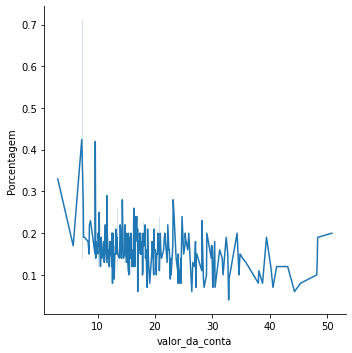

In [ ]:
# sem o kind = 'line' o gráfico ficaria idêntico ao gráfico passado
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'Porcentagem', data=gorjetas, kind='line')

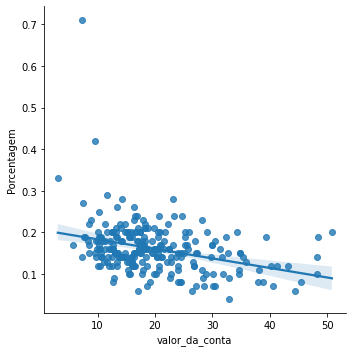

In [ ]:

sns.lmplot(x = 'valor_da_conta', y = 'Porcentagem', data=gorjetas)

**assim é possível ver que a porcentagem realmente está caindo**

# Análise 2 - Sobremesa

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,Porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.06
1,10.34,1.66,não,Domingo,Janta,3,0.16
2,21.01,3.50,não,Domingo,Janta,3,0.17
3,23.68,3.31,não,Domingo,Janta,2,0.14
4,24.59,3.61,não,Domingo,Janta,4,0.15


Nesse momento queremos saber se quem pediu sobremesa deu uma gorjeta maior, menor ou a sobremesa não influenciou na gorjeta
Primeiro vamos visualizar aqueles que pediram sobremesa
```



In [ ]:
gorjetas[gorjetas.sobremesa == 'sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,Porcentagem
56,38.01,3.00,sim,Sabado,Janta,4,0.08
58,11.24,1.76,sim,Sabado,Janta,2,0.16
60,20.29,3.21,sim,Sabado,Janta,2,0.16
61,13.81,2.00,sim,Sabado,Janta,2,0.14
62,11.02,1.98,sim,Sabado,Janta,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,sim,Sabado,Janta,2,0.19
236,12.60,1.00,sim,Sabado,Janta,2,0.08
237,32.83,1.17,sim,Sabado,Janta,2,0.04
240,27.18,2.00,sim,Sabado,Janta,2,0.07


In [ ]:
gorjetas[gorjetas.sobremesa == 'sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,Porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
# Descrição dos que não pediram
gorjetas[gorjetas.sobremesa == 'não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,Porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


Vamos agora criar um gráfico categórico, serão plotados todos os pontos daqueles que pediram a sobremesa e eixo y sendo a gorjeta 

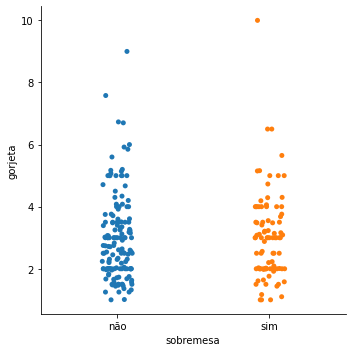

In [ ]:
sns.catplot(x = 'sobremesa', y='gorjeta', data=gorjetas)

Ainda não está tão claro se a sobremesa influencia na gorjeta, então será usado outro gráfico de auxílio

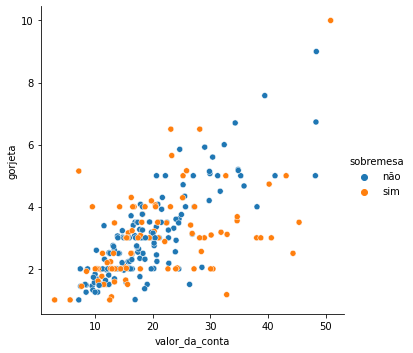

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa', data=gorjetas)

Como já sabemos, quanto maior a conta maior é a gorjeta (não proporcional), porém com esse gráfico, aqueles que não pediram sobremesa teve uma sequência quase linear.
Agora vamos fazer um gráfico com uma coluna só para o "não" e uma só para o "sim".

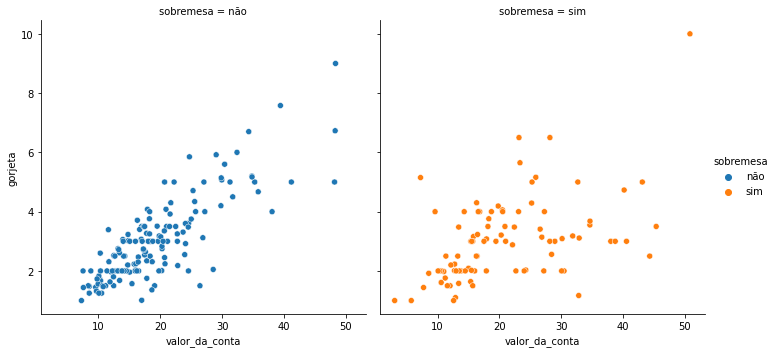

In [ ]:
# com mais um parâmetro foi possível fazer essa alteração
sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',col='sobremesa', data=gorjetas)

Fica bem claro que os que não pediram sobremesa tiveram uma linearidade no valor da gorjeta, enquanto os que pediram sobremesa estão bem mais distribuídos

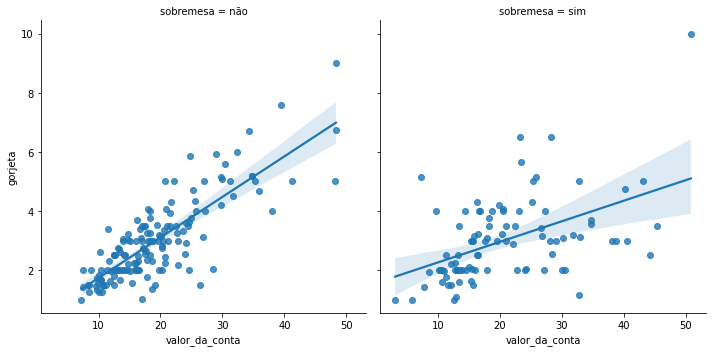

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta',col='sobremesa', data=gorjetas)

Foi traçado uma linha por método de mínimos quadrados, fica ainda mais evidente o que foi feito anteriormente.
Já sabemos que existe uma diferença entre os que pediram e não pediram sobremesa, o que falta é saber se isso influencia na gorjeta

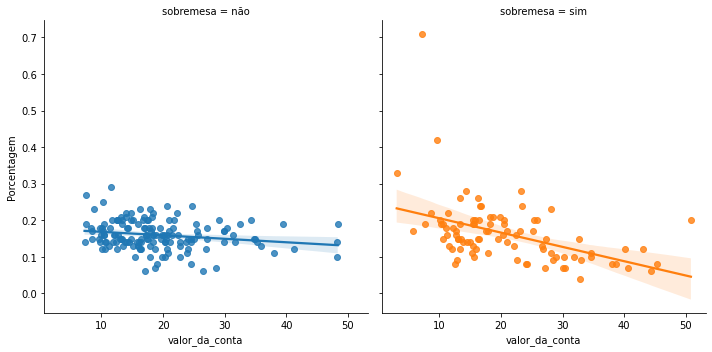

In [ ]:
sns.lmplot(x='valor_da_conta', y='Porcentagem',hue='sobremesa',col='sobremesa', data=gorjetas)

Agora foi feita a análise proporcional, aqueles que não prediram sobremesa a proporcionalidade não caiu tanto quanto caiu com aqueles que pediram

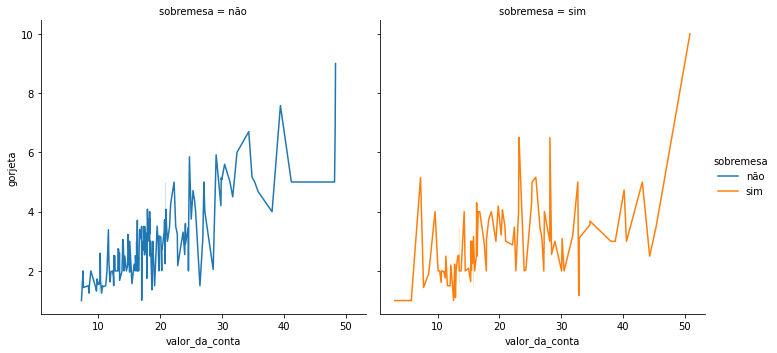

In [ ]:
# Agora um gráfico de linhas
sns.relplot(x='valor_da_conta', y='gorjeta',hue='sobremesa',col='sobremesa',kind='line', data=gorjetas)

Percebemos que pedir sobremesa ou não pedir faz uma diferença muito sutil no valor da gorjeta, por isso a matemática será usada para resolver esse problema

# Teste de hipótese

**H<sup>null</sup>**

**A distribuição da taxa da gorjeta é a mesma nos grupos**

**H<sup>alt</sup>**

**A distribuição da taxa da gorjeta não é a mesma nos grupos**

In [ ]:
from scipy.stats import ranksums

Agora queremos trazer a porcentagem de todas as pessoas que pediram sobremesa



In [ ]:
# Os que pediram sobremesa
sobremesa =gorjetas.query("sobremesa =='sim' ").Porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: Porcentagem, Length: 93, dtype: float64

In [ ]:
# Os que não pediram sobremesa
sem_sobremesa =gorjetas.query("sobremesa =='não' ").Porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: Porcentagem, Length: 151, dtype: float64

In [ ]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

pvalue=0.52 mostra para nós que mesmo esses dois grupos tendo uma diferença de dados entre sí, matematicamente essa diferença é insignificante.
Nesse caso ficaremos com hipótese nula, pois para aceitar a hipótese alternativa o pvalue tem de ser menor ou igual a 0.5

# Análise 3 -- dias da semana

Agora iremos analizar se o dia da semana influencia no valor da gorjeta

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

vamos primeiro verificar com gráico qual dia da semana as pessoas gastam mais

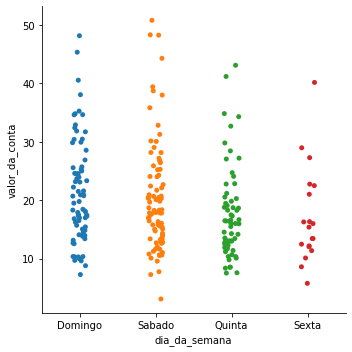

In [ ]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data=gorjetas)

Parece que aos Sábados e domingos as pessoas gastam mais, porém a diferença não é tão grande, vamos agora plotar todos juntos em um gráfico só

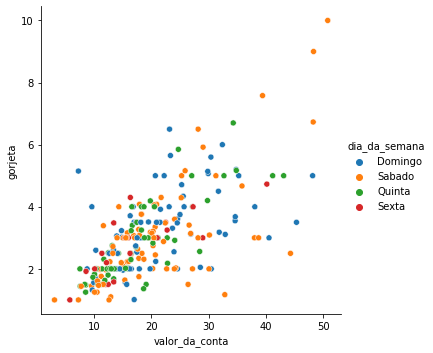

In [ ]:
# o hue irá separar as cores por dias da semana
sns.relplot(x ='valor_da_conta', y='gorjeta',hue='dia_da_semana', data=gorjetas)

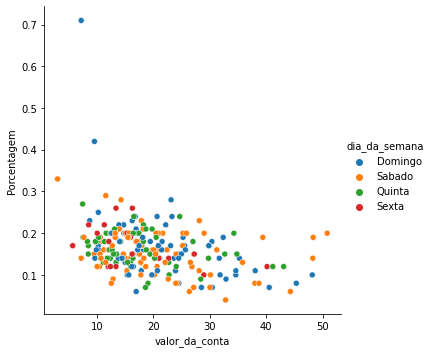

In [ ]:
sns.relplot(x ='valor_da_conta', y='Porcentagem',hue='dia_da_semana', data=gorjetas)

Ainda está muito confuso, por isso vamos plotar em cada gráfico um dia da semana, levando em mente valor da conta e a porcentagem

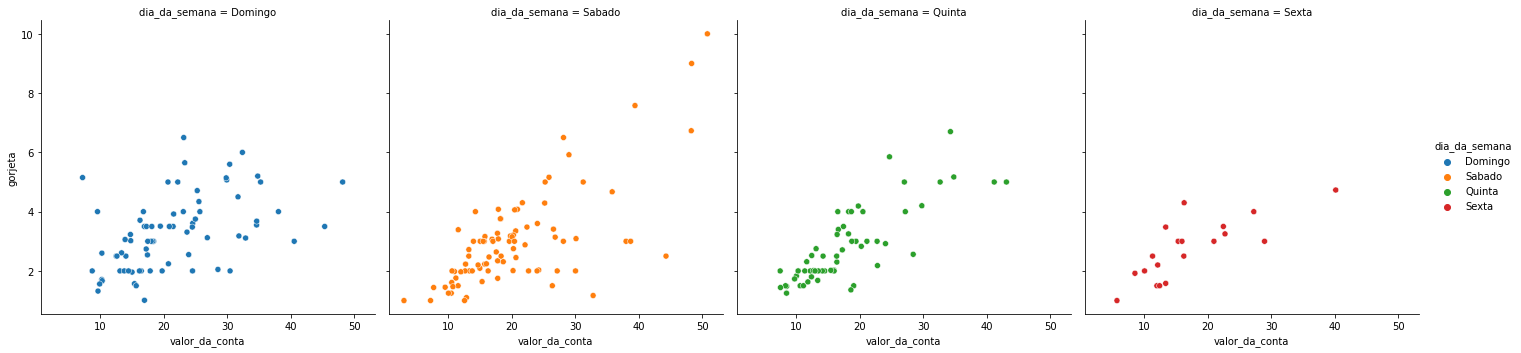

In [ ]:
# com o col='dia_da_semana' é possível separar os gráficos por dias da semana
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col='dia_da_semana', data=gorjetas)

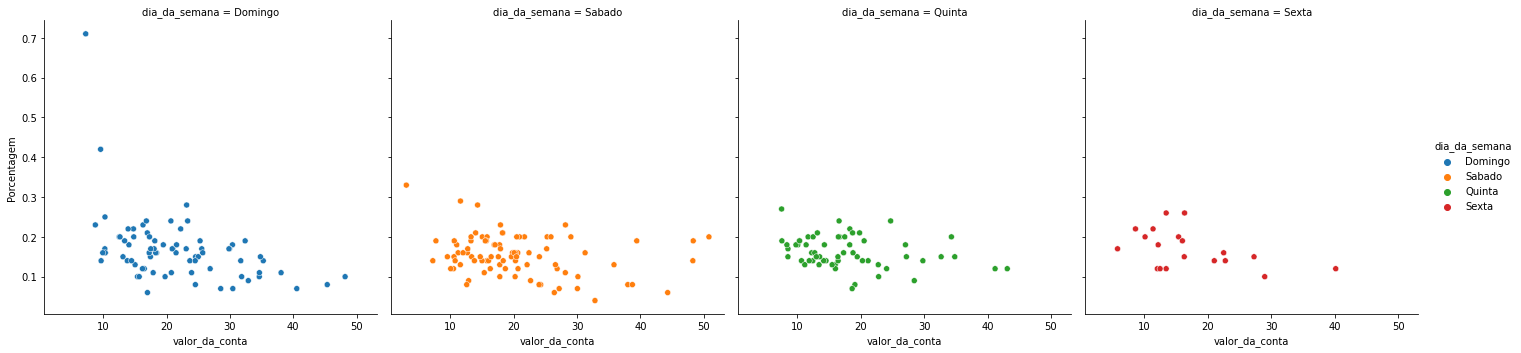

In [ ]:
#Agora proporcionalmente
sns.relplot(x='valor_da_conta', y='Porcentagem', hue='dia_da_semana',col='dia_da_semana', data=gorjetas)

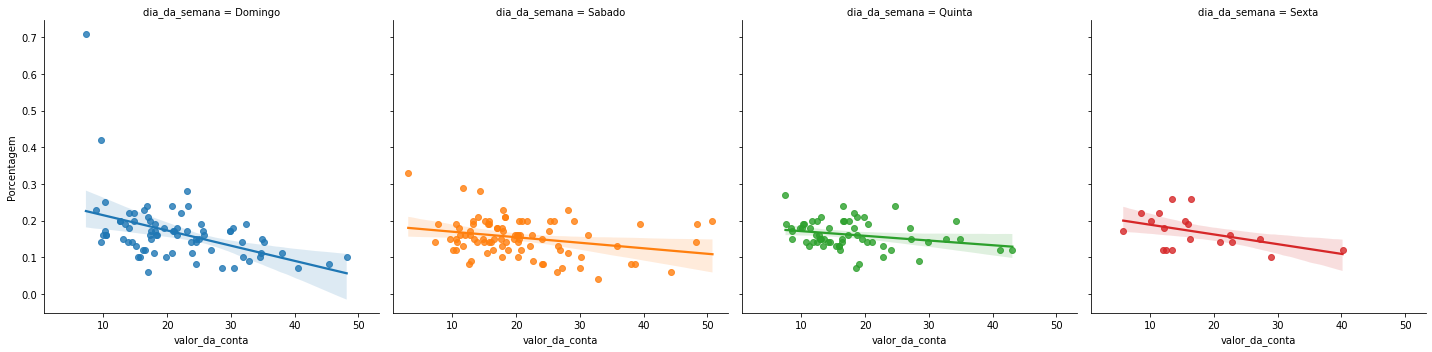

In [ ]:
sns.lmplot(x='valor_da_conta', y='Porcentagem', hue='dia_da_semana',col='dia_da_semana', data=gorjetas)

Agora vamos vazer uma análise descritiva

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de:', media_geral_gorjetas)

A média geral das gorjetas é de: 2.9982786885245902


Agora queremos pegar a média de cada dia da semana

In [ ]:
#Agrupamos o dataframe por dias da semana e depois pedimos a média
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','Porcentagem']]

,valor_da_conta,gorjeta,Porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


**É possível ver que no domingo o valor médio da gorjeta foi o maior**

Agora vem a pergunta, será que no sábado vão mais pessoas que no domingo? isso faria talvez a média ser influenciada, vamos checar agora

In [ ]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no sábado e domingo**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no sábado e domingo**

In [ ]:
# Todos os valores das contas nos domingos
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [ ]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta

In [ ]:
ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

Aceitariamos a hipótese alternativa se o pvalue fosse maenor que 0.05, como ele é bem maior aceitamos que a distribuição do valor da conta é igual no sábado e domingo.

# Análise 4 -- Hora do dia

Agora queremos analisar se a hora do dia influencia no valor da conta e na porcentagem

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora,total_de_pessoas,Porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.06
1,10.34,1.66,não,Domingo,Janta,3,0.16
2,21.01,3.50,não,Domingo,Janta,3,0.17
3,23.68,3.31,não,Domingo,Janta,2,0.14
4,24.59,3.61,não,Domingo,Janta,4,0.15


In [ ]:
gorjetas.hora.unique()

array(['Janta', 'Almoço'], dtype=object)

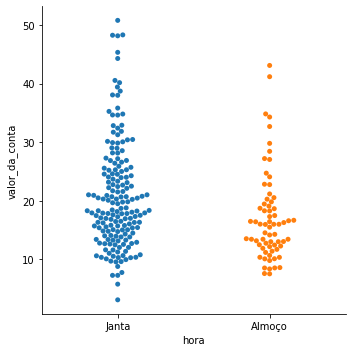

In [ ]:
sns.catplot(x ='hora', y='valor_da_conta', data=gorjetas, kind = 'swarm')

Parece que durante o jantar as contas são maiores, mas precisamos investigar ainda mais

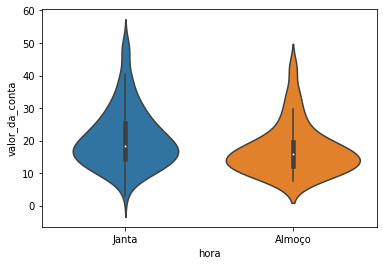

In [ ]:
sns.violinplot(x ='hora', y='valor_da_conta', data=gorjetas)

Podemos ver que existe um grupo maior mais concentrado no almoço na parte mais baixa em relação ao da janta, isso sujere que o valor da conta é mais baixa no almoço do que a janta

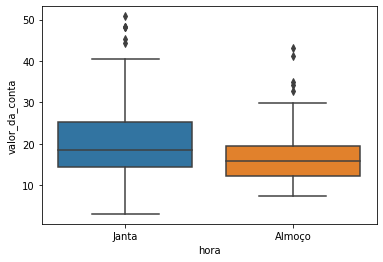

In [ ]:
sns.boxplot(x ='hora', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora =='Almoço'").valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


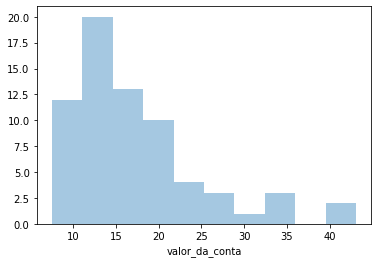

In [ ]:
sns.distplot(almoco, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


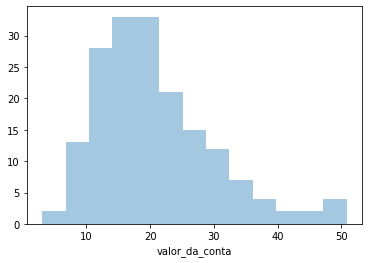

In [ ]:
janta = gorjetas.query("hora =='Janta'").valor_da_conta
sns.distplot(janta, kde=False)

In [ ]:
gorjetas.groupby(['hora']).mean()[['valor_da_conta','gorjeta','Porcentagem']]

,valor_da_conta,gorjeta,Porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Janta,20.797159,3.102670,0.159773


## Teste de hipótese

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no jantar e almoço**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no jantar e almoço**

In [ ]:
ranksums(janta, almoco)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

**Como o pvalue foi menor que 0.05 então ficamos com a alternativa que a distribuição do valor da conta não é igual no jantar e almoço**